In [95]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

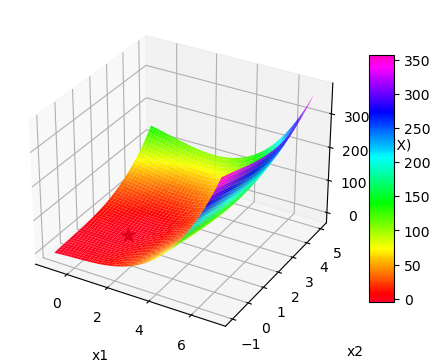

In [96]:
#surface plot

f = lambda x1, x2: x1**3 +x2**3 - 3*x1*x2
x2 = np.linspace(-1,5,100)
x1 = np.linspace(-1,7,100)

x1, x2 = np.meshgrid(x1,x2)
F = f(x1,x2)

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(1,2,1,projection='3d') # set up the axis as a 3D plot
ax.scatter3D(1,1,f(1,1),c="black",marker="*",s=100)
surf = ax.plot_surface(x1,x2,F, cmap= 'gist_rainbow')
fig.colorbar(surf,shrink=0.4, aspect=10)
# set axes label
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=30)
ax.set_zlabel('f(X)', labelpad=10)

plt.show()

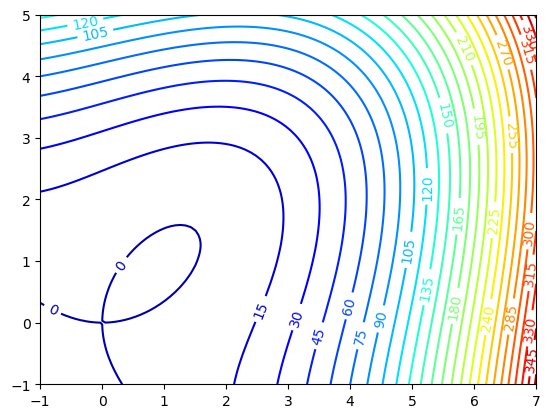

In [97]:
#contour plot

f = lambda x1, x2: x1**3 +x2**3 - 3*x1*x2

x2 = np.linspace(-1,5,100)
x1 = np.linspace(-1,7,100)

x1, x2 = np.meshgrid(x1,x2)
F = f(x1,x2)
N=25 # number of levels
cp = plt.contour(x1,x2,F,N,cmap='jet')
plt.clabel(cp)

plt.show()

In [98]:
# minimize function without constraints

f = lambda x: x[0]**3 +x[1]**3 - 3*x[0]*x[1]
x0 = [2,1.5]
res = minimize(f,x0)
res


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.9999999999999993
        x: [ 1.000e+00  1.000e+00]
      nit: 7
      jac: [ 1.043e-07 -4.470e-08]
 hess_inv: [[ 2.215e-01  1.111e-01]
            [ 1.111e-01  2.223e-01]]
     nfev: 27
     njev: 9

In [99]:
# minimize function with constraints

f = lambda x: x[0]**3 +x[1]**3 - 3*x[0]*x[1]
cons = ({'type': 'ineq','fun': lambda x: 3*x[0]+x[1]-3}, # All constraints are greater than type
        {'type': 'ineq','fun': lambda x: 5*x[0]-3*x[1]-5},
        {'type': 'eq','fun': lambda x: 3*x[0]+x[1]-3}, # All constraints are greater than type
        {'type': 'eq','fun': lambda x: 5*x[0]-3*x[1]-5}
        )

bnds = ((0,None),(0,None)) 

x0 = (2,0)
res = minimize(f,x0, bounds=bnds, constraints= cons)

res2 = minimize(f,x0)
res2

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.9999999999998475
        x: [ 1.000e+00  1.000e+00]
      nit: 7
      jac: [-1.237e-06  1.088e-06]
 hess_inv: [[ 2.205e-01  1.126e-01]
            [ 1.126e-01  2.214e-01]]
     nfev: 27
     njev: 9

In [100]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.999999999999999
       x: [ 1.000e+00  3.331e-16]
     nit: 2
     jac: [ 3.000e+00 -3.000e+00]
    nfev: 6
    njev: 2

In [101]:
res3 = minimize(f,x0,bounds=bnds,constraints=cons)
res3

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.999999999999999
       x: [ 1.000e+00  3.331e-16]
     nit: 2
     jac: [ 3.000e+00 -3.000e+00]
    nfev: 6
    njev: 2

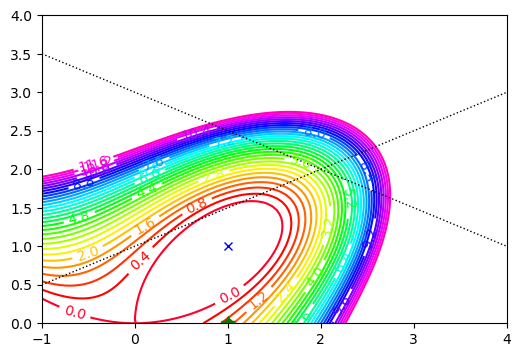

In [102]:
x = np.linspace(-1, 4, 100)
y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))

fig = plt.figure(figsize=(6,4))
#ax = fig.add_subplot(1,2,1, projection='3d') # set up the axis as a 3D plot
#surf = ax.plot_surface(X,Y,F, cmap= 'gist_rainbow')
#fig.colorbar(surf,shrink=0.4, aspect=10)

#ax = fig.add_subplot(1,2,2)
levels = np.arange(0.0,12,0.4)
cp = plt.contour(X, Y, Z,levels=levels, cmap='gist_rainbow');
plt.clabel(cp)
plt.plot(x, (x+2)/2, 'k:', linewidth=1)
plt.plot(res.x[0],res.x[1],c='r',marker='o')
plt.plot(res2.x[0],res2.x[1],c='b',marker='x')
plt.plot(res3.x[0],res3.x[1],c='g',marker='*',markersize=10)
plt.plot(x, (-x+6)/2, 'k:', linewidth=1)
#plt.fill([1.25,1.25,1.75,1.75], [1.5,2.75,1.5,1.75], alpha=0.3)
plt.axis([-1,4,0,4])
plt.show()